# Flood Prediction By using modified feature engineering techniques

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import tensorflow as ts
from sklearn import metrics

In [2]:
df=pd.read_csv('flood.csv', na_values=['#NAME?'])

In [3]:
df.head(5)

,Sl,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood?
0,0,Barisal,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1949.01,NaN
1,1,Barisal,1949,2,33.9,15.2,9.0,63.0,0.659259,0.9,8.314894,41950,536809.8,510151.9,22.7,90.36,4,1949.02,NaN
2,2,Barisal,1949,3,36.7,20.2,8.0,59.0,1.085185,1.5,8.131915,41950,536809.8,510151.9,22.7,90.36,4,1949.03,NaN
3,3,Barisal,1949,4,33.9,23.9,140.0,71.0,1.772222,3.9,8.219149,41950,536809.8,510151.9,22.7,90.36,4,1949.04,NaN
4,4,Barisal,1949,5,35.6,25.0,217.0,76.0,1.703704,4.1,7.046809,41950,536809.8,510151.9,22.7,90.36,4,1949.05,NaN


In [4]:
df.shape

(20544, 19)

In [40]:
df['Flood?'].unique()

array([nan,  1.,  0.])

In [41]:
df['Flood?'].fillna(value=0, inplace=True)

In [42]:
X = df.drop(['Sl','Flood?'], axis=1)
y = df['Flood?']

In [43]:
X.head(5)

,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period
0,Barisal,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1949.01
1,Barisal,1949,2,33.9,15.2,9.0,63.0,0.659259,0.9,8.314894,41950,536809.8,510151.9,22.7,90.36,4,1949.02
2,Barisal,1949,3,36.7,20.2,8.0,59.0,1.085185,1.5,8.131915,41950,536809.8,510151.9,22.7,90.36,4,1949.03
3,Barisal,1949,4,33.9,23.9,140.0,71.0,1.772222,3.9,8.219149,41950,536809.8,510151.9,22.7,90.36,4,1949.04
4,Barisal,1949,5,35.6,25.0,217.0,76.0,1.703704,4.1,7.046809,41950,536809.8,510151.9,22.7,90.36,4,1949.05


In [44]:
print(y.value_counts())

0.0    16412
1.0     4132
Name: Flood?, dtype: int64


In [45]:
# Decide which categorical variables you want to use in model
for col_name in X.columns:
    if X[col_name].dtypes == 'object':
        unique_cat = len(X[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'Station_Names' has 33 unique categories


In [46]:
todummy_list=['Station_Names']

In [47]:
#Funtion to create the dummy list from the categorical features 
def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        df = df.drop(x, axis=1)
        df = pd.concat([df, dummies], axis=1)
    return df

In [48]:
X = dummy_df(X, todummy_list)
print(X.head(5))

   Year  Month  Max_Temp  Min_Temp  Rainfall  Relative_Humidity  Wind_Speed  \
0  1949      1      29.4      12.3       0.0               68.0    0.453704   
1  1949      2      33.9      15.2       9.0               63.0    0.659259   
2  1949      3      36.7      20.2       8.0               59.0    1.085185   
3  1949      4      33.9      23.9     140.0               71.0    1.772222   
4  1949      5      35.6      25.0     217.0               76.0    1.703704   

   Cloud_Coverage  Bright_Sunshine  Station_Number  ...  \
0             0.6         7.831915           41950  ...   
1             0.9         8.314894           41950  ...   
2             1.5         8.131915           41950  ...   
3             3.9         8.219149           41950  ...   
4             4.1         7.046809           41950  ...   

   Station_Names_Rajshahi  Station_Names_Rangamati  Station_Names_Rangpur  \
0                       0                        0                      0   
1               

# Handling with Missing data

In [49]:
X.isnull().sum().sort_values(ascending=False).head()

Year                      0
Station_Names_Dinajpur    0
Station_Names_Feni        0
Station_Names_Hatiya      0
Station_Names_Ishurdi     0
dtype: int64

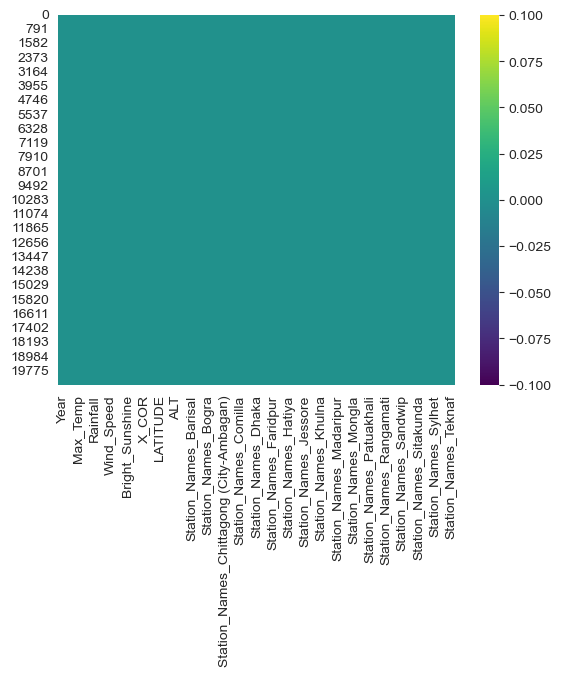

In [50]:
sns.set_style('whitegrid')
sns.heatmap(X.isnull(), cmap='viridis')
plt.tight_layout
plt.savefig('Checking for missing data.png',dpi=200)

In [51]:
y.value_counts

<bound method IndexOpsMixin.value_counts of 0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
20539    1.0
20540    0.0
20541    0.0
20542    0.0
20543    0.0
Name: Flood?, Length: 20544, dtype: float64>

In [52]:
y.value_counts

<bound method IndexOpsMixin.value_counts of 0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
20539    1.0
20540    0.0
20541    0.0
20542    0.0
20543    0.0
Name: Flood?, Length: 20544, dtype: float64>

In [53]:
print(y.value_counts())

0.0    16412
1.0     4132
Name: Flood?, dtype: int64


# We are skipping the outlier detection steps here.

# Distribution of Features by Statistical Seaborn Library. 


In [54]:
data=pd.concat([X,y], axis=1)

In [55]:
data.head(2)

,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,...,Station_Names_Rangamati,Station_Names_Rangpur,Station_Names_Sandwip,Station_Names_Satkhira,Station_Names_Sitakunda,Station_Names_Srimangal,Station_Names_Sylhet,Station_Names_Tangail,Station_Names_Teknaf,Flood?
0,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,...,0,0,0,0,0,0,0,0,0,0.0
1,1949,2,33.9,15.2,9.0,63.0,0.659259,0.9,8.314894,41950,...,0,0,0,0,0,0,0,0,0,0.0


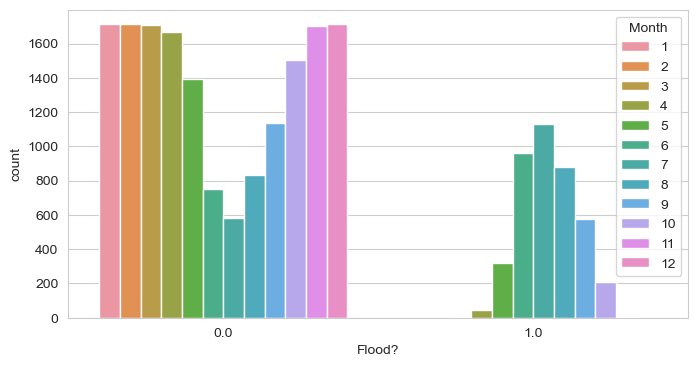

In [56]:
#Our target is to classify the flood condition at differnt time. 
#So check the Flood condition with respect to Months
plt.figure(figsize=(8,4))
sns.countplot(x='Flood?',data=data, hue='Month')
plt.savefig('Montly flood scenario.png',dpi=300)

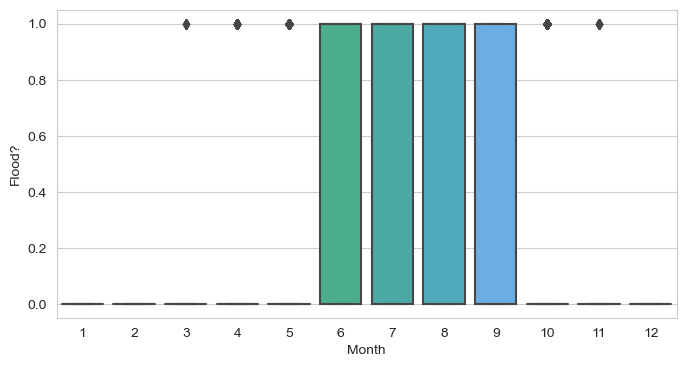

In [57]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Month',y='Flood?',data=data)
plt.savefig('Box plot-Montly flood scenario.png',dpi=300)

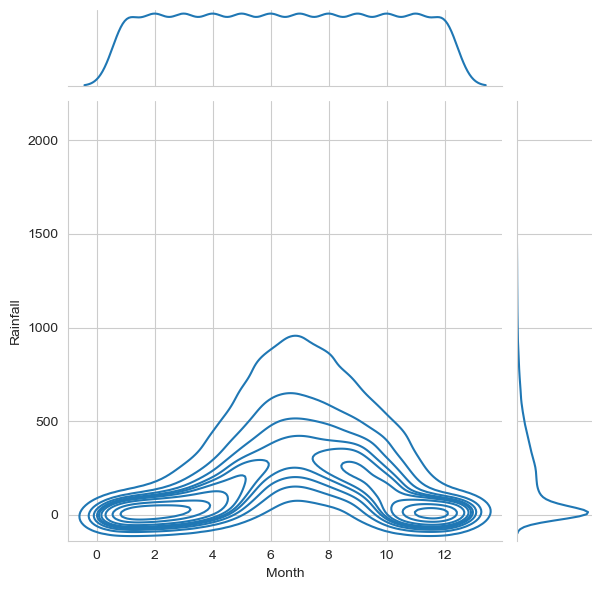

In [58]:
#Joint plot
sns.jointplot(x='Month',y='Rainfall',data=data, kind='kde')
plt.tight_layout
plt.savefig('Montly Rain Scenario.jpg.png',dpi=300)

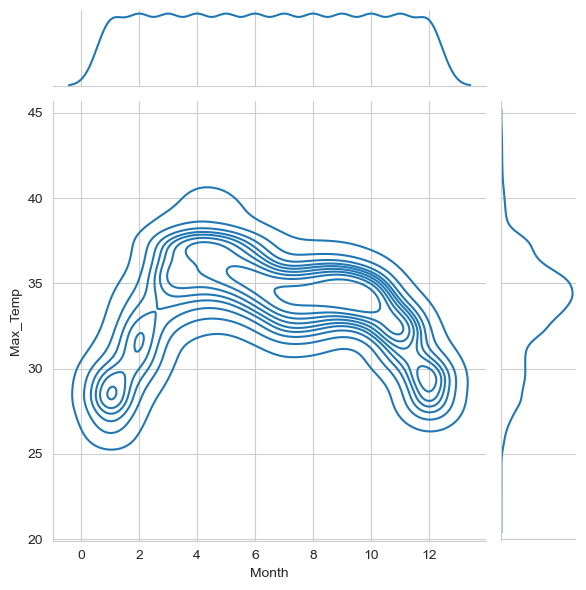

In [59]:
#Joint plot
sns.jointplot(x='Month',y='Max_Temp',data=data, kind='kde')
plt.tight_layout
plt.savefig('Montly Maximume Temperature Scenario.png',dpi=300)

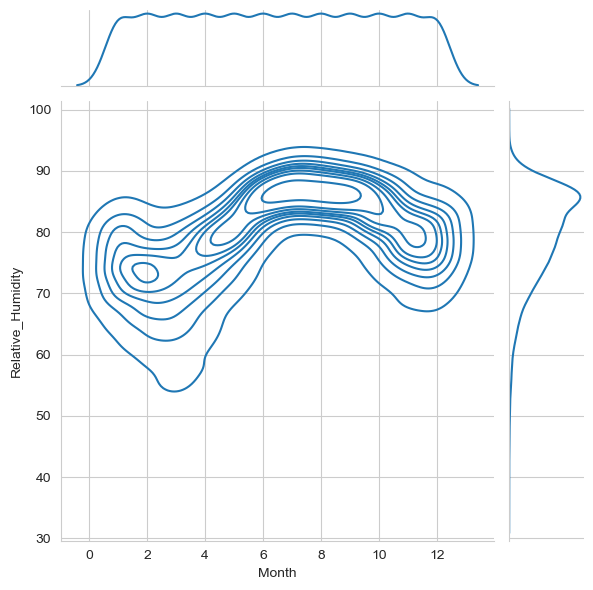

In [60]:
#Joint plot
sns.jointplot(x='Month',y='Relative_Humidity',data=data, kind='kde')
plt.tight_layout
plt.savefig('Montly Relative Humadity Scenario.png',dpi=300)

# Feature Engineering Method 

A. Interaction amongsts the features

A simple two-way interaction is represented by:
X3 = X1 * X2, where X3 is the interaction between X1 and X2
Can add interaction terms as additional new features to your model; useful for model if the impact of two or more features on the outcome is non-additive


In [61]:
# Use PolynomialFeatures in sklearn.preprocessing to create two-way interactions for all features
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures

def add_interactions(df):
    # Get feature names
    combos = list(combinations(list(df.columns), 2))
    colnames = list(df.columns) + ['_'.join(x) for x in combos]
    
    # Find interactions
    poly = PolynomialFeatures(interaction_only=True, include_bias=False)
    df = poly.fit_transform(df)
    df = pd.DataFrame(df)
    df.columns = colnames
    
    # Remove interaction terms with all 0 values            
    noint_indicies = [i for i, x in enumerate(list((df == 0).all())) if x]
    df = df.drop(df.columns[noint_indicies], axis=1)
    
    return df

In [62]:
X = add_interactions(X)
print(X.head(5))

     Year  Month  Max_Temp  Min_Temp  Rainfall  Relative_Humidity  Wind_Speed  \
0  1949.0    1.0      29.4      12.3       0.0               68.0    0.453704   
1  1949.0    2.0      33.9      15.2       9.0               63.0    0.659259   
2  1949.0    3.0      36.7      20.2       8.0               59.0    1.085185   
3  1949.0    4.0      33.9      23.9     140.0               71.0    1.772222   
4  1949.0    5.0      35.6      25.0     217.0               76.0    1.703704   

   Cloud_Coverage  Bright_Sunshine  Station_Number  ...  \
0             0.6         7.831915         41950.0  ...   
1             0.9         8.314894         41950.0  ...   
2             1.5         8.131915         41950.0  ...   
3             3.9         8.219149         41950.0  ...   
4             4.1         7.046809         41950.0  ...   

   Period_Station_Names_Rajshahi  Period_Station_Names_Rangamati  \
0                            0.0                             0.0   
1                     

In [63]:
# The total number of features have grown substantially after dummying and adding interaction terms
print(df.shape)
print(X.shape)

(20544, 19)
(20544, 694)


B. Dimentionality Reduction Using PCA

We can reduce the dimentionality of the features by using PCA. But we will use the Feature Selection Techniques 

In [64]:
# Use train_test_split in sklearn.cross_validation to split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=1)

In [65]:
# Such a large set of features can cause overfitting and also slow computing
# Use feature selection to select the most important features
from sklearn.feature_selection import chi2, f_regression 
import sklearn.feature_selection

select = sklearn.feature_selection.SelectKBest(score_func=chi2, k=20)
selected_features = select.fit(X_train, y_train)
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [X.columns[i] for i in indices_selected]

X_train_selected_unscaled = X_train[colnames_selected]
X_test_selected_unscaled = X_test[colnames_selected]

In [66]:
print(colnames_selected)

['Year_Rainfall', 'Year_X_COR', 'Year_Y_COR', 'Min_Temp_X_COR', 'Min_Temp_Y_COR', 'Rainfall_Station_Number', 'Rainfall_X_COR', 'Rainfall_Y_COR', 'Rainfall_Period', 'Relative_Humidity_X_COR', 'Relative_Humidity_Y_COR', 'Cloud_Coverage_X_COR', 'Cloud_Coverage_Y_COR', 'Bright_Sunshine_X_COR', 'Bright_Sunshine_Y_COR', 'Station_Number_X_COR', 'Station_Number_Y_COR', 'X_COR_Y_COR', 'X_COR_Period', 'Y_COR_Period']


# Data Scaling and Normalization

In [67]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train_selected_unscaled)

X_train_selected=scaler.transform(X_train_selected_unscaled)
X_test_selected=scaler.transform(X_test_selected_unscaled)

X_train_selected.mean(axis=0)

array([ 2.94363514e-16,  6.31123186e-15,  3.13632600e-15, -1.79647674e-15,
        2.00803541e-14, -7.12766270e-17,  2.41680420e-15,  2.20712801e-16,
       -2.81044698e-15, -1.12392285e-14,  2.41562937e-14, -9.04309852e-15,
       -3.19958864e-15,  1.97434713e-14,  3.65609876e-14,  1.06365004e-13,
        4.87900942e-14,  1.73759330e-13, -1.90240556e-14,  4.14104232e-14])

In [68]:
X_train_selected.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

# Model Design (a) Logistic Regression

In [69]:
# Function to build model and find model performance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def find_lr_model_perf(X_train, y_train, X_test, y_test):
    model = LogisticRegression(solver='lbfgs', max_iter=500)
    model.fit(X_train, y_train)
    y_hat = [x[1] for x in model.predict_proba(X_test)]
    fpr_lr, tpr_lr, _ = metrics.roc_curve(y_test,  y_hat)
    auc = roc_auc_score(y_test, y_hat)
    
    plt.plot(fpr_lr,tpr_lr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()

    
    predictions=model.predict(X_test)
    print(classification_report(y_test,predictions))
    return auc, predictions,fpr_lr, tpr_lr


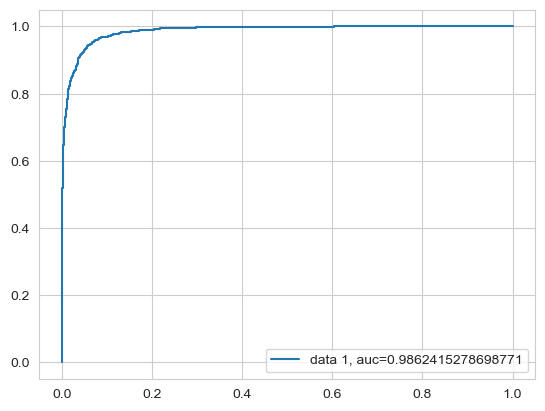

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97      4905
         1.0       0.89      0.86      0.88      1259

    accuracy                           0.95      6164
   macro avg       0.93      0.92      0.92      6164
weighted avg       0.95      0.95      0.95      6164



[[4771  134]
 [ 175 1084]]


Accuracy of the Model: 0.9862415278698771


In [70]:
# Find performance of model using preprocessed data
auc_processed, predictions, fpr_lr, tpr_lr = find_lr_model_perf(X_train_selected, y_train, X_test_selected, y_test)
print('\n')
print(confusion_matrix(y_test,predictions))
print('\n')
print('Accuracy of the Model:', auc_processed)

## Model Design (b) Decision Tree model

In [71]:
from sklearn.tree import DecisionTreeClassifier

def find_dt_model_perf(X_train, y_train, X_test, y_test):
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    y_hat = [x[1] for x in model.predict_proba(X_test)]
    auc = roc_auc_score(y_test, y_hat)
    
    fpr_dt, tpr_dt, _ = metrics.roc_curve(y_test,  y_hat)
        
    plt.plot(fpr_dt,tpr_dt,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()
    
    predictions=model.predict(X_test)
    print(classification_report(y_test,predictions))
    return auc, predictions, fpr_dt, tpr_dt

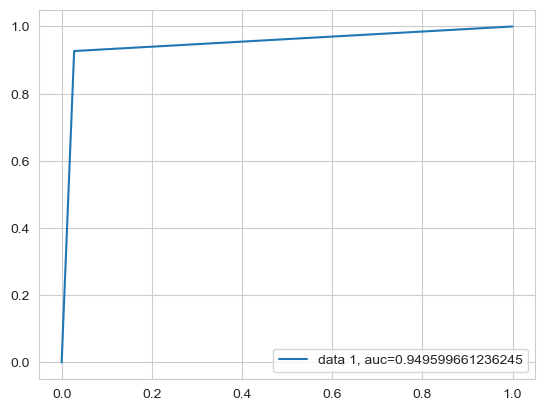

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98      4905
         1.0       0.90      0.93      0.91      1259

    accuracy                           0.96      6164
   macro avg       0.94      0.95      0.94      6164
weighted avg       0.96      0.96      0.96      6164



[[4769  136]
 [  92 1167]]


Accuracy of the Model: 0.949599661236245


In [74]:
# Find performance of model using preprocessed data
auc_processed, predictions, fpr_dt, tpr_dt = find_dt_model_perf(X_train_selected, y_train, X_test_selected, y_test)
print('\n')
print(confusion_matrix(y_test,predictions))
print('\n')
print('Accuracy of the Model:', auc_processed)

## Model design (c) KNN

In [75]:
from sklearn.neighbors import KNeighborsClassifier

def find_knn_model_perf(X_train, y_train, X_test, y_test):
    model = KNeighborsClassifier(n_neighbors=13)
    model.fit(X_train, y_train)
    y_hat = [x[1] for x in model.predict_proba(X_test)]
    auc = roc_auc_score(y_test, y_hat)
    
    fpr_knn, tpr_knn, _ = metrics.roc_curve(y_test,  y_hat) 
    plt.plot(fpr_knn,tpr_knn,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()
    
    predictions=model.predict(X_test)
    print(classification_report(y_test,predictions))
    return auc, predictions, fpr_knn, tpr_knn

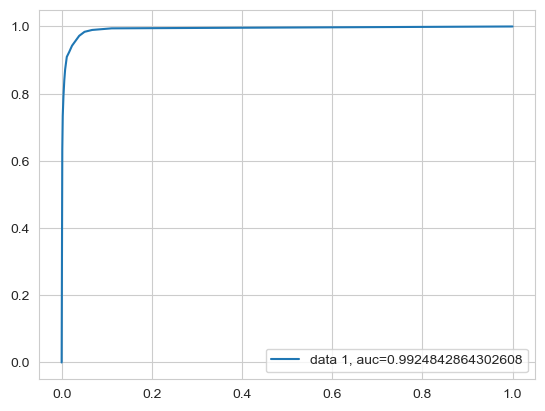

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      4905
         1.0       0.93      0.92      0.93      1259

    accuracy                           0.97      6164
   macro avg       0.96      0.95      0.96      6164
weighted avg       0.97      0.97      0.97      6164



[[4822   83]
 [  95 1164]]


Accuracy of the Model: 0.9924842864302608


C:\Users\abid1\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [77]:
# Find performance of model using preprocessed data
auc_processed, predictions, fpr_knn, tpr_knn = find_knn_model_perf(X_train_selected, y_train, X_test_selected, y_test)
print('\n')
print(confusion_matrix(y_test,predictions))
print('\n')
print('Accuracy of the Model:', auc_processed)

## Applying the Elbow method to Identify the Perfect K(Number of Neighbors) value!!!

In [78]:
#Elbow method to choose perfect K value
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_selected,y_train)
    pred_i=knn.predict(X_test_selected)
    error_rate.append(np.mean(pred_i!=y_test))

C:\Users\abid1\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\abid1\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\abid1\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\abid1\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\abid1\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\abid1\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

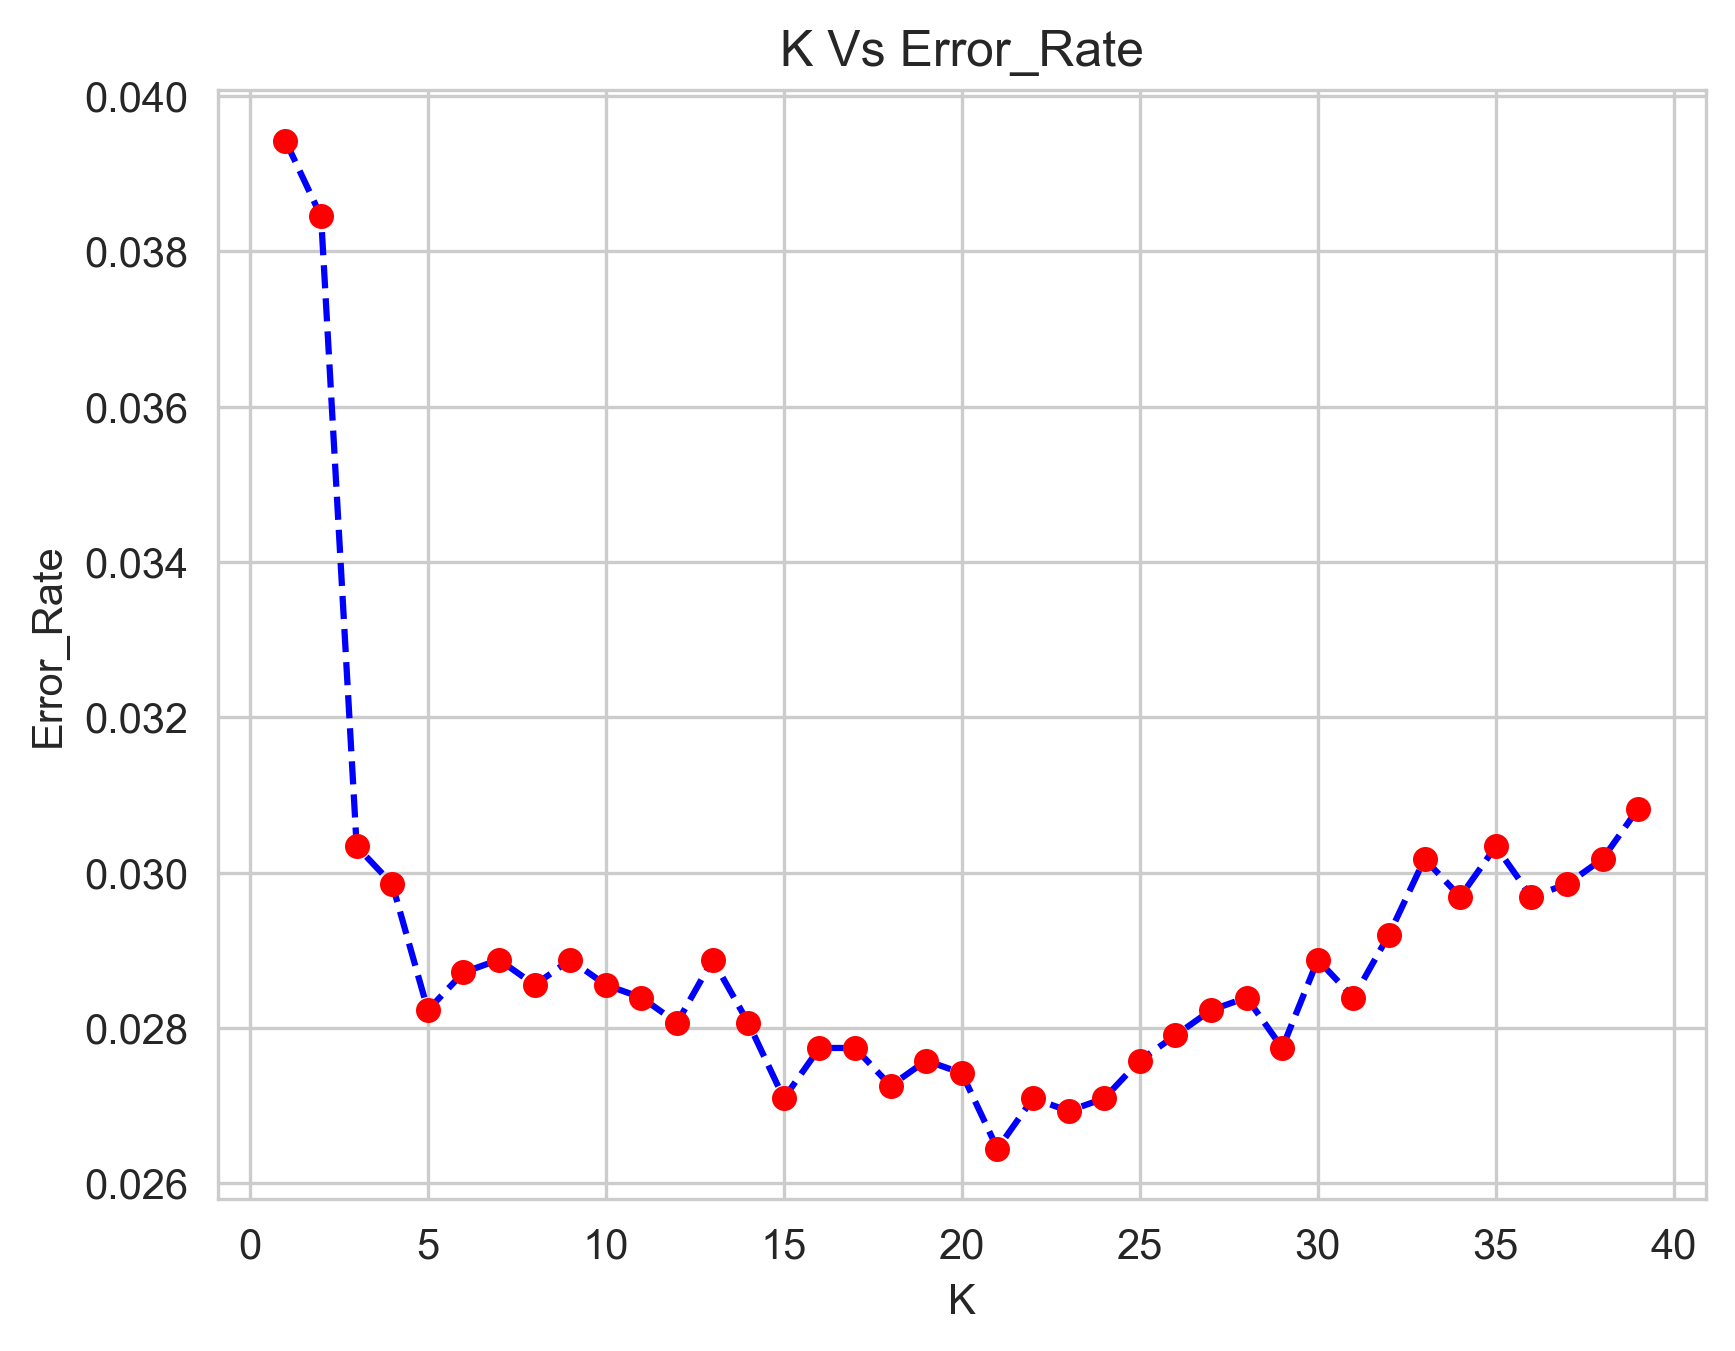

In [80]:
plt.figure(dpi=300)
plt.plot(range(1,40),error_rate,'b--',marker='o',markerfacecolor='r',markeredgecolor='r', markersize=5)
plt.tight_layout
plt.xlabel('K')
plt.ylabel('Error_Rate')
plt.title('K Vs Error_Rate')
#sns.set_style('whitegrid')
plt.savefig('Finding Perfect Value for K by elbow Method', dpi=300)

In [81]:
# Find performance of model using preprocessed data
auc_processed, predictions = find_knn_model_perf(X_train_selected, y_train, X_test_selected, y_test)
print('\n')
print(confusion_matrix(y_test,predictions))
print('\n')
print('Accuracy of the Model:', auc_processed)

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      4905
         1.0       0.94      0.93      0.94      1259

    accuracy                           0.97      6164
   macro avg       0.96      0.96      0.96      6164
weighted avg       0.97      0.97      0.97      6164



[[4826   79]
 [  83 1176]]


Accuracy of the Model: 0.99267876791687


## Model Design (c) Random forest_RF

In [82]:
from sklearn.ensemble import RandomForestClassifier

def find_rf_model_perf(X_train, y_train, X_test, y_test):
    model = RandomForestClassifier(n_estimators=500)
    model.fit(X_train, y_train)
    y_hat = [x[1] for x in model.predict_proba(X_test)]
    auc = roc_auc_score(y_test, y_hat)
    
    fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test,  y_hat)
    plt.plot(fpr_rf,tpr_rf,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()
    
    predictions=model.predict(X_test)
    print(classification_report(y_test,predictions))
    return auc, predictions, fpr_rf, tpr_rf

In [83]:
# Find performance of model using preprocessed data
auc_processed, predictions = find_rf_model_perf(X_train_selected, y_train, X_test_selected, y_test)
print('\n')
print(confusion_matrix(y_test,predictions))
print('\n')
print('Accuracy of the Model:', auc_processed)

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      4905
         1.0       0.94      0.95      0.94      1259

    accuracy                           0.98      6164
   macro avg       0.96      0.96      0.96      6164
weighted avg       0.98      0.98      0.98      6164



[[4830   75]
 [  69 1190]]


Accuracy of the Model: 0.994765112191204


In [84]:
from sklearn.svm import SVC

def find_svc_model_perf(X_train, y_train, X_test, y_test):
    model = SVC(kernel='rbf', probability=True)
    model.fit(X_train, y_train)
    y_hat = [x[1] for x in model.predict_proba(X_test)]
    auc = roc_auc_score(y_test, y_hat)
    
    fpr_svc, tpr_svc, _ = metrics.roc_curve(y_test,  y_hat)   
    plt.plot(fpr_svc,tpr_svc,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()
    
    predictions=model.predict(X_test)
    print(classification_report(y_test,predictions))
    return auc, predictions, fpr_svc, tpr_svc

In [85]:
# Find performance of model using preprocessed data
auc_processed, predictions = find_svc_model_perf(X_train_selected, y_train, X_test_selected, y_test)
print('\n')
print(confusion_matrix(y_test,predictions))
print('\n')
print('Accuracy of the Model:', auc_processed)

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      4905
         1.0       0.92      0.92      0.92      1259

    accuracy                           0.97      6164
   macro avg       0.95      0.95      0.95      6164
weighted avg       0.97      0.97      0.97      6164



[[4800  105]
 [ 106 1153]]


Accuracy of the Model: 0.9901429787082444


# Instead of giving the defaault value lets apply Grid Search method to find the best input parameter for the Kernel. 

In [86]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

# grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=10)
# grid.fit(X_train_selected,y_train)

In [87]:
# grid.best_params_

In [88]:
# grid.best_estimator_

In [89]:
# grid_predictions = grid.predict(X_test_selected)

In [90]:
# print(confusion_matrix(y_test,grid_predictions))
# print('\n')
# print(classification_report(y_test,grid_predictions))

## Model Design (d) Deep Neural Networks

In [91]:
#For DNN data should be scaled in MinMax Scale

In [92]:
from sklearn.preprocessing import MinMaxScaler

In [93]:
scaler=MinMaxScaler()
scaler.fit_transform(X_train_selected_unscaled)

X_train_selected=scaler.transform(X_train_selected_unscaled)
X_test_selected=scaler.transform(X_test_selected_unscaled)

In [94]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [95]:
model=Sequential()

model.add(Dense(40,activation='relu'))

model.add(Dense(20,activation='relu'))

model.add(Dense(10,activation='relu'))

#Binary Classification Probelm so the last activation function will be Sigmoid ...
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [96]:
model.fit(x=X_train_selected,y=y_train,epochs=200,validation_data=(X_test_selected, y_test))

Epoch 1/200
450/450 [==============================] - 5s 7ms/step - loss: 0.2506 - val_loss: 0.1429
Epoch 2/200
450/450 [==============================] - 2s 5ms/step - loss: 0.1438 - val_loss: 0.1379
Epoch 3/200
450/450 [==============================] - 2s 4ms/step - loss: 0.1372 - val_loss: 0.1375
Epoch 4/200
450/450 [==============================] - 2s 5ms/step - loss: 0.1339 - val_loss: 0.1249
Epoch 5/200
450/450 [==============================] - 2s 4ms/step - loss: 0.1299 - val_loss: 0.1226
Epoch 6/200
450/450 [==============================] - 2s 5ms/step - loss: 0.1278 - val_loss: 0.1211
Epoch 7/200
450/450 [==============================] - 3s 6ms/step - loss: 0.1260 - val_loss: 0.1209
Epoch 8/200
450/450 [==============================] - 3s 6ms/step - loss: 0.1234 - val_loss: 0.1216
Epoch 9/200
450/450 [==============================] - 2s 5ms/step - loss: 0.1218 - val_loss: 0.1161
Epoch 10/200
450/450 [==============================] - 2s 4ms/step - loss: 0.1180 - val_lo

Epoch 161/200
450/450 [==============================] - 2s 4ms/step - loss: 0.0688 - val_loss: 0.0818
Epoch 162/200
450/450 [==============================] - 2s 5ms/step - loss: 0.0675 - val_loss: 0.0763
Epoch 163/200
450/450 [==============================] - 2s 5ms/step - loss: 0.0685 - val_loss: 0.0749
Epoch 164/200
450/450 [==============================] - 2s 5ms/step - loss: 0.0677 - val_loss: 0.0758
Epoch 165/200
450/450 [==============================] - 2s 5ms/step - loss: 0.0682 - val_loss: 0.0764
Epoch 166/200
450/450 [==============================] - 2s 4ms/step - loss: 0.0677 - val_loss: 0.0744
Epoch 167/200
450/450 [==============================] - 1s 3ms/step - loss: 0.0683 - val_loss: 0.0748
Epoch 168/200
450/450 [==============================] - 1s 3ms/step - loss: 0.0674 - val_loss: 0.0737
Epoch 169/200
450/450 [==============================] - 2s 4ms/step - loss: 0.0678 - val_loss: 0.0731
Epoch 170/200
450/450 [==============================] - 2s 5ms/step - lo

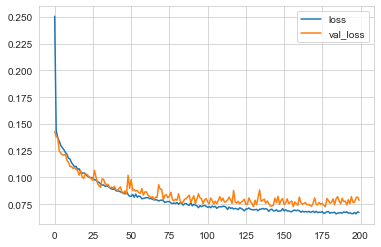

In [97]:
losses=pd.DataFrame(model.history.history)

losses.plot()
plt.savefig('Deep Neural Network over fitting problem.png',dpi=200)

In [98]:
model=Sequential()

model.add(Dense(40,activation='relu'))

model.add(Dense(20,activation='relu'))

model.add(Dense(10,activation='relu'))

#Binary Classification Probelm so the last activation function will be Sigmoid ...
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

Help on class EarlyStopping in module keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantity
 |        to qualify 

450/450 [==============================] - 4s 6ms/step - loss: 0.2682 - val_loss: 0.2006
Epoch 2/200
450/450 [==============================] - 2s 5ms/step - loss: 0.1829 - val_loss: 0.1706
Epoch 3/200
450/450 [==============================] - 2s 5ms/step - loss: 0.1606 - val_loss: 0.1493
Epoch 4/200
450/450 [==============================] - 2s 5ms/step - loss: 0.1496 - val_loss: 0.1536
Epoch 5/200
450/450 [==============================] - 2s 5ms/step - loss: 0.1377 - val_loss: 0.1365
Epoch 6/200
450/450 [==============================] - 1s 3ms/step - loss: 0.1299 - val_loss: 0.1274
Epoch 7/200
450/450 [==============================] - 1s 3ms/step - loss: 0.1242 - val_loss: 0.1326
Epoch 8/200
450/450 [==============================] - 2s 4ms/step - loss: 0.1197 - val_loss: 0.1175
Epoch 9/200
450/450 [==============================] - 2s 5ms/step - loss: 0.1150 - val_loss: 0.1187
Epoch 10/200
450/450 [==============================] - 2s 5ms/step - loss: 0.1128 - val_loss: 0.1099
E

Epoch 161/200
450/450 [==============================] - 2s 5ms/step - loss: 0.0652 - val_loss: 0.0730
Epoch 162/200
450/450 [==============================] - 2s 5ms/step - loss: 0.0658 - val_loss: 0.0777
Epoch 163/200
450/450 [==============================] - 2s 5ms/step - loss: 0.0658 - val_loss: 0.0710
Epoch 164/200
450/450 [==============================] - 2s 5ms/step - loss: 0.0654 - val_loss: 0.0721
Epoch 165/200
450/450 [==============================] - 2s 5ms/step - loss: 0.0659 - val_loss: 0.0773
Epoch 166/200
450/450 [==============================] - 1s 3ms/step - loss: 0.0664 - val_loss: 0.0731
Epoch 167/200
450/450 [==============================] - 1s 3ms/step - loss: 0.0653 - val_loss: 0.0733
Epoch 167: early stopping


<AxesSubplot:>

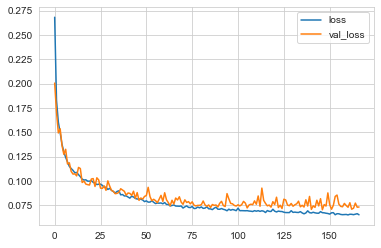

In [99]:
from tensorflow.keras.callbacks import EarlyStopping

help(EarlyStopping)
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=20)

model.fit(x=X_train_selected,y=y_train,epochs=200,validation_data=(X_test_selected,y_test),
         callbacks=[early_stop])

model_loss=pd.DataFrame(model.history.history)
model_loss.plot()

In [100]:
from tensorflow.keras.layers import Dropout

In [101]:
model=Sequential()

model.add(Dense(40,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(20,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10,activation='relu'))
model.add(Dropout(0.5))

#Binary Classification Probelm so the last activation function will be Sigmoid ...
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [102]:
model.fit(x=X_train_selected,y=y_train,epochs=200,validation_data=(X_test_selected,y_test),
         callbacks=[early_stop])

Epoch 1/200
450/450 [==============================] - 4s 6ms/step - loss: 0.4233 - val_loss: 0.1910
Epoch 2/200
450/450 [==============================] - 2s 5ms/step - loss: 0.2374 - val_loss: 0.1348
Epoch 3/200
450/450 [==============================] - 2s 5ms/step - loss: 0.1961 - val_loss: 0.1215
Epoch 4/200
450/450 [==============================] - 2s 5ms/step - loss: 0.1891 - val_loss: 0.1197
Epoch 5/200
450/450 [==============================] - 2s 5ms/step - loss: 0.1776 - val_loss: 0.1218
Epoch 6/200
450/450 [==============================] - 2s 3ms/step - loss: 0.1754 - val_loss: 0.1223
Epoch 7/200
450/450 [==============================] - 2s 4ms/step - loss: 0.1732 - val_loss: 0.1182
Epoch 8/200
450/450 [==============================] - 2s 5ms/step - loss: 0.1756 - val_loss: 0.1284
Epoch 9/200
450/450 [==============================] - 2s 5ms/step - loss: 0.1717 - val_loss: 0.1197
Epoch 10/200
450/450 [==============================] - 3s 7ms/step - loss: 0.1738 - val_lo

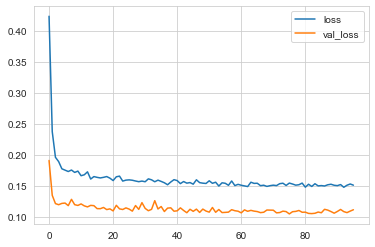

In [103]:
model_loss=pd.DataFrame(model.history.history)
model_loss.plot()
plt.savefig('Deep Neural Network over fitting problem solved by Dropout and Callback functoin.png',dpi=200)

In [104]:
predictions = (model.predict(X_test_selected) > 0.5).astype("int32")

193/193 [==============================] - 1s 3ms/step


In [105]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')


[[4695  210]
 [  60 1199]]


              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97      4905
         1.0       0.85      0.95      0.90      1259

    accuracy                           0.96      6164
   macro avg       0.92      0.95      0.94      6164
weighted avg       0.96      0.96      0.96      6164



